In [28]:
import tensorflow as tf

In [30]:
mnist = tf.keras.datasets.mnist

Keras is installed in tensorflow..
MNIST datasets has 60000 training and 10000 testing sampales

In [32]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

In [36]:
import matplotlib.pyplot as plt

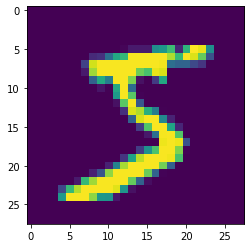

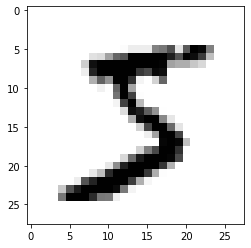

In [38]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [40]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

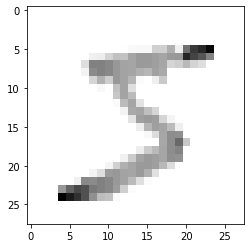

In [42]:
x_train = tf.keras.utils.normalize(x_train, axis = 1) ##Normalizing
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [44]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [46]:
print(y_train[0])

5


Reshaping by increasing another dimension for convolutional operation

In [48]:
import numpy as np
img_size=28
x_train_r = np.array(x_train).reshape(-1,img_size,img_size,1)
x_test_r = np.array(x_test).reshape(-1,img_size,img_size,1)
print(x_train_r.shape)
print(x_test_r.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_train_r.shape[1:])) ## For first convolution layer (28:28:1). For one image..
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3))) ## For 2nd convolution layer 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3))) ## For 3rd convolution layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10)) ##The last dense layer must be 10... multiple neuron
model.add(Activation("softmax")) ##Final Activation funtion... 
        ##If it was binary classification (single layer) then we would have used sigmoid function


In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [54]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [56]:
model.fit(x_train_r,y_train,epochs = 5, validation_split = 0.2) ##training from loss

Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3101 - accuracy: 0.9005 - val_loss: 0.1174 - val_accuracy: 0.9653
Epoch 2/5
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0963 - accuracy: 0.9708 - val_loss: 0.0748 - val_accuracy: 0.9778
Epoch 3/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0681 - accuracy: 0.9796 - val_loss: 0.0651 - val_accuracy: 0.9799
Epoch 4/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.0596 - val_accuracy: 0.9807
Epoch 5/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0511 - val_accuracy: 0.9835


In [58]:
test_loss,test_acc=model.evaluate(x_train_r,y_train)
print(test_loss, test_acc)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0318 - accuracy: 0.9900
0.03182493895292282 0.9900000095367432


In [60]:
prediction = model.predict(x_test_r)
print(prediction)

[[3.82427544e-07 1.07109520e-06 2.62556159e-06 ... 9.99984860e-01
  2.12650690e-07 9.91155412e-06]
 [1.16172276e-04 1.47042607e-04 9.99724329e-01 ... 9.39381971e-06
  3.76496303e-07 2.77588068e-08]
 [3.23299588e-07 9.99990821e-01 4.54789166e-08 ... 1.15072140e-07
  3.72515302e-07 5.64475556e-07]
 ...
 [2.41020626e-09 1.82240072e-08 1.25082311e-09 ... 5.88071671e-08
  3.86557213e-06 2.09757059e-06]
 [3.87705654e-07 8.56403559e-10 3.15385296e-09 ... 8.38263573e-12
  2.69688121e-06 2.40254553e-06]
 [6.25373696e-06 5.08417202e-07 1.62276738e-05 ... 4.05380511e-08
  3.64913967e-06 3.12732766e-07]]


In [62]:
print(np.argmax(prediction[0]))

7


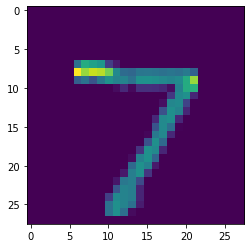

In [64]:
plt.imshow(x_test[0])

In [66]:
print(np.argmax(prediction[0]))

7


In [68]:
print(np.argmax(prediction[125]))

9


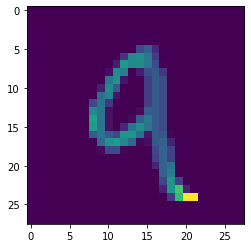

In [70]:
plt.imshow(x_test[125])

In [72]:
import cv2
img = cv2.imread('3.png')

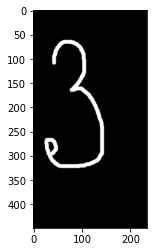

In [74]:
plt.imshow(img)

In [76]:
img.shape

(449, 235, 3)

In [78]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [80]:
img.shape

(449, 235)

In [82]:
img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)

In [84]:
img.shape

(28, 28)

In [86]:
new_img = tf.keras.utils.normalize(img, axis = 1) ##Normalizing
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)

In [88]:
new_img.shape

(1, 28, 28, 1)

In [90]:
p = model.predict(new_img)

In [92]:
print(np.argmax(p))

3
